# Price - Active Addresses Correlation Example

## Intro

### Imports

In [1]:
%reload_ext autoreload
%autoreload 2

In [2]:
import os
import sys
from dotenv import load_dotenv


In [3]:
import matplotlib.pyplot as plt
from  matplotlib.colors import LinearSegmentedColormap
import pandas as pd
from tqdm.notebook import tqdm, trange

from helixirapi.helixir_api import HelixirApi

In [4]:
import matplotlib.pyplot as plt
plt.style.use('ggplot')

import plotly.io as pio
pio.renderers.default = "notebook_connected"

### Create client instance

In [5]:
load_dotenv()
AUTH_TOKEN = os.getenv("AUTH_TOKEN")
client = HelixirApi(auth_token=AUTH_TOKEN)
client

## Get Data

In [6]:
from_ = "2021-01-01"
# from_ = "2022-01-01"
to = "2022-06-01"
resolution = "D1"
# resolution = "H1"

# contract = "0x3EE2200Efb3400fAbB9AacF31297cBdD1d435D47" ## ADA
contract="0xbb4CdB9CBd36B01bD1cBaEBF2De08d9173bc095c" ## WBNB
# contract = "0xbA2aE424d960c26247Dd6c32edC70B295c744C43" ## DOGE
chain="BSC"

token = client.get_token(
    contract = contract,
    chain = chain,
)
token

TokenResponse(
	id = 10,
	name = Wrapped BNB,
	symbol = WBNB,
	chain = BSC,
	active = True,
	decimals = 18.0,
	total_supply = 4634368.539092917,
	circulating_supply = 4634361.645115168,
	contract = 0xbb4CdB9CBd36B01bD1cBaEBF2De08d9173bc095c,
)

### Price Data

In [7]:
candles = pd.DataFrame([c.__dict__ for c in client.get_candles(
    contract = contract,
    chain = chain,
    from_ = from_,
    to = to,
    resolution = resolution,
)]).set_index("time")
candles

/home/rene/Documents/turing/repos/helixir-api-client/helixirapi/helixir_api.py:265: UserWarning:

Data are available only from 2021-04-12 13:45:00+02:00.



Iterating requests to meet the limit:   0%|          | 0/18 [00:00<?, ?it/s]

,open,high,low,close
time,,,,
2021-06-04 00:00:00+00:00,377.923827,397.694912,368.456794,391.592154
2021-06-05 00:00:00+00:00,391.590809,424.723674,375.068992,391.377782
2021-06-06 00:00:00+00:00,391.376479,399.970684,382.276405,393.286072
2021-06-07 00:00:00+00:00,393.283887,406.129157,354.879839,357.165654
2021-06-08 00:00:00+00:00,357.184378,367.749295,318.175204,353.323988
...,...,...,...,...
2022-05-25 00:00:00+00:00,327.671847,336.853177,324.364524,325.922814
2022-05-26 00:00:00+00:00,325.923186,330.543528,298.289859,303.288045
2022-05-27 00:00:00+00:00,303.288797,308.608263,291.269436,300.337727


### Active Addresses Data

In [ ]:
addresses = pd.DataFrame([c.__dict__ for c in client.get_active_addresses(
    contract = contract,
    chain = chain,
    from_ = from_,
    to = to,
    resolution = resolution,
)]).set_index("time")
addresses

Iterating requests to meet the limit:   0%|          | 0/18 [00:00<?, ?it/s]

In [50]:
for s in range(-10, 11, 1):
    addresses[f"count-shift={s}"] = addresses["count"].shift(s)
addresses

,count,count-shift=-10,count-shift=-9,count-shift=-8,count-shift=-7,count-shift=-6,count-shift=-5,count-shift=-4,count-shift=-3,count-shift=-2,...,count-shift=1,count-shift=2,count-shift=3,count-shift=4,count-shift=5,count-shift=6,count-shift=7,count-shift=8,count-shift=9,count-shift=10
time,,,,,,,,,,,,,,,,,,,,,
2021-06-04 00:00:00+00:00,20533,32178.0,29498.0,28129.0,30656.0,29801.0,29829.0,28408.0,30940.0,27974.0,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-05 00:00:00+00:00,29643,32735.0,32178.0,29498.0,28129.0,30656.0,29801.0,29829.0,28408.0,30940.0,...,20533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-06 00:00:00+00:00,27974,32140.0,32735.0,32178.0,29498.0,28129.0,30656.0,29801.0,29829.0,28408.0,...,29643.0,20533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-07 00:00:00+00:00,30940,32617.0,32140.0,32735.0,32178.0,29498.0,28129.0,30656.0,29801.0,29829.0,...,27974.0,29643.0,20533.0,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2021-06-08 00:00:00+00:00,28408,30356.0,32617.0,32140.0,32735.0,32178.0,29498.0,28129.0,30656.0,29801.0,...,30940.0,27974.0,29643.0,20533.0,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2022-05-25 00:00:00+00:00,18752,NaN,NaN,NaN,NaN,NaN,NaN,19057.0,16913.0,18192.0,...,18681.0,19142.0,17604.0,18502.0,17712.0,17907.0,17824.0,34456.0,18169.0,18069.0
2022-05-26 00:00:00+00:00,18891,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19057.0,16913.0,...,18752.0,18681.0,19142.0,17604.0,18502.0,17712.0,17907.0,17824.0,34456.0,18169.0
2022-05-27 00:00:00+00:00,18192,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,19057.0,...,18891.0,18752.0,18681.0,19142.0,17604.0,18502.0,17712.0,17907.0,17824.0,34456.0


## Calculate Correlation

In [51]:
correlations = addresses.drop(columns=["count"]).corrwith(candles["close"])
print(f"Maximal correlation: {max(correlations)}")
correlations

Maximal correlation: 0.2701452788295776


count-shift=-10    0.185597
count-shift=-9     0.231740
count-shift=-8     0.227047
count-shift=-7     0.251683
count-shift=-6     0.258968
count-shift=-5     0.270145
count-shift=-4     0.200651
count-shift=-3     0.134557
count-shift=-2     0.135587
count-shift=-1     0.095193
count-shift=0      0.040531
count-shift=1     -0.040043
count-shift=2     -0.034736
count-shift=3     -0.068566
count-shift=4     -0.084188
count-shift=5     -0.079031
count-shift=6     -0.051648
count-shift=7     -0.030138
count-shift=8     -0.000158
count-shift=9     -0.003785
count-shift=10    -0.012457
dtype: float64

In [52]:
rwg_cmap=LinearSegmentedColormap.from_list('rg',["r", "w", "g"], N=256)
pd.DataFrame(
    correlations,
    columns=["correlation"],
).T.style.background_gradient(
    cmap=rwg_cmap,
    axis=None,
    # vmin=-1,
    # vmax=1,
)

,count-shift=-10,count-shift=-9,count-shift=-8,count-shift=-7,count-shift=-6,count-shift=-5,count-shift=-4,count-shift=-3,count-shift=-2,count-shift=-1,count-shift=0,count-shift=1,count-shift=2,count-shift=3,count-shift=4,count-shift=5,count-shift=6,count-shift=7,count-shift=8,count-shift=9,count-shift=10
correlation,0.185597,0.231740,0.227047,0.251683,0.258968,0.270145,0.200651,0.134557,0.135587,0.095193,0.040531,-0.040043,-0.034736,-0.068566,-0.084188,-0.079031,-0.051648,-0.030138,-0.000158,-0.003785,-0.012457


We can see that the highest correlation is reached for `shift = -5`. We can say:
- Correlation values for negative shift are stronger, so _active addresses are delayed against prices_.
- This is a _positive_ correlation, so if the price increases, the number of active addresses is also likely to rise.
- Most likely, the delay of active addresses will be about 5 days.

## Plot Data

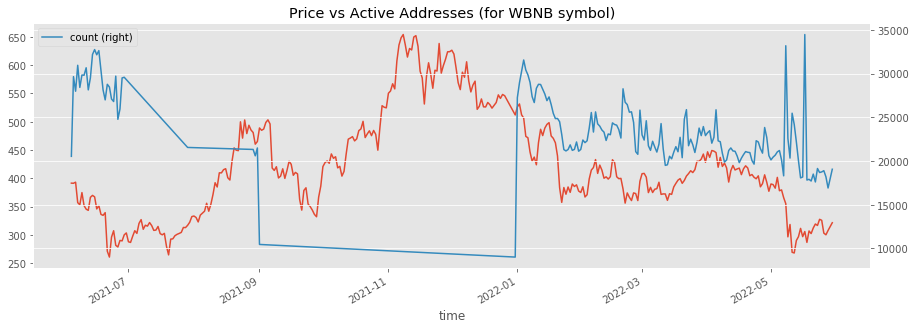

In [54]:
candles["close"].plot(figsize=(15, 5))
addresses["count"].plot(secondary_y=True)
plt.legend()
plt.title(f"Price vs Active Addresses (for {token.symbol} symbol)")
plt.show()